In [14]:
import cv2
import os
import h5py
import numpy as np
folder_path = r"C:\Users\accer\Desktop\Assigment_3\Dogs"
output_folder_path = r"C:\Users\accer\Desktop\Assigment_3\Resized_Dogs"

# Create the output folder if it doesn't exist
os.makedirs(output_folder_path, exist_ok=True)

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        # Read the image
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)    
        if image is not None:
            # Resize the image to a desired size (e.g., 64x64)
            resized_image = cv2.resize(image, (64, 64))

            # Save the resized image to the output folder
            output_path = os.path.join(output_folder_path, filename)
            cv2.imwrite(output_path, resized_image)
        else:
            print("Failed to read the image:", image_path)

#convert into list
image1 = []

directory =r"C:\Users\accer\Desktop\Assigment_3\Resized_Dogs"
labels= []
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path)
        
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            if "dog" in filename:
                label = 1  # Dog category
            else:
                label = 0  # Not dog category

            image1.append(image)
            labels.append(label)
            
        else:

            print("Failed to read the image:", image_path)            
            
            
# create file for trainning dataset
train_images = image1
train_labels = labels

with h5py.File("train_dogsnondogs.h5", "w") as hf:
    train_set_x = hf.create_dataset("train_set_x", data=train_images)
    train_set_y = hf.create_dataset("train_set_y", data=train_labels)
    
    
#Now same procedure for testing data set
folder_path_test = r"C:\Users\accer\Desktop\Assigment_3\test_dogs"
output_folder_path_test = r"C:\Users\accer\Desktop\Assigment_3\Test_Resized_Dogs"

os.makedirs(output_folder_path_test, exist_ok=True)

for filename in os.listdir(folder_path_test):
    if filename.endswith(".jpg"):
        # Read the image
        image_path = os.path.join(folder_path_test, filename)
        image = cv2.imread(image_path)
        
        if image is not None:
            # Resize the image to a desired size (e.g., 64x64)
            resized_image = cv2.resize(image, (64, 64))
            
            # Save the resized image to the output folder
            output_path = os.path.join(output_folder_path_test, filename)
            cv2.imwrite(output_path, resized_image)
        else:
            print("Failed to read the image:", image_path)
            
#Convert testing dataset into list
image2 = []
directory_test =r"C:\Users\accer\Desktop\Assigment_3\Test_Resized_Dogs"
labels2= []
for filename in os.listdir(directory_test):
    if filename.endswith(".jpg"):
        image_path = os.path.join(directory_test, filename)
        image = cv2.imread(image_path)
        
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            if "dog" in filename:
                label2 = 1  # Dog category
            else:
                label2 = 0  # Not dog category

            image2.append(image)
            labels2.append(label2)
            
        else:

            print("Failed to read the image:", image_path) 
            
#Create hdf5 file for trainning dataset             
test_images = image2
test_labels = labels2
 
with h5py.File("test_dogsnondogs.h5", "w") as hf:
    test_set_x = hf.create_dataset("test_set_x", data=test_images)
    test_set_y = hf.create_dataset("test_set_y", data=test_labels)            

classes = np.unique(labels + labels2)

# Print the list of classes
print("Classes:", classes)     

Classes: [0 1]


In [18]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

  
#load dataset    
def load_dataset():
    train_dataset = h5py.File('train_dogsnondogs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_dogsnondogs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(['Not Dog', 'Dog']) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
index = 121
 
#plt.imshow(train_set_x[:,index].reshape((num_px, num_px, 3)))    
print("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])] + "' picture.")


y = [1], it's a 'Dog' picture.


In [3]:
### START CODE HERE ### (≈ 3 lines of code)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
     

Number of training examples: m_train = 150
Number of testing examples: m_test = 52
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (150, 64, 64, 3)
train_set_y shape: (1, 150)
test_set_x shape: (52, 64, 64, 3)
test_set_y shape: (1, 52)


In [5]:
# Reshape the training and test examples
# train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes
## convert into 2D matrix where each column represent each image
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

##Standardrize our dataset
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.


train_set_x_flatten shape: (12288, 150)
train_set_y shape: (1, 150)
test_set_x_flatten shape: (12288, 52)
test_set_y shape: (1, 52)
sanity check after reshaping: [36 33 40 40 37]


In [6]:
#sigmoid function
import numpy as np
def sigmoid(z):
    s = 1 /(1 + np.exp(-z))
    return s
#print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0

    assert w.shape == (dim, 1)
    assert isinstance(b, float) or isinstance(b, int)

    return w, b
num_px = 64  # Assuming images have a size of 64x64 pixels
channels = 3  # RGB color channels
dim = num_px * num_px * channels
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
b = 0


In [7]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T, X) + b)  # compute activation
    cost = (-1./m)*np.sum((Y*np.log(A)+(1-Y)*np.log(1-A)), axis=1) # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (1./m)*np.dot(X,((A-Y).T))
    db = (1./m)*np.sum(A-Y, axis=1)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost
     


In [11]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):    
    costs = []
    
    for i in range(num_iterations):
        # Cost and grad ient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w=w, b=b, X=X, Y=Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate*dw
        b = b - learning_rate*db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs
     
 

In [12]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        if A[0, i] >= 0.5:
            Y_prediction[0, i] = 1            
        else:
            Y_prediction[0, i] = 0
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction
     
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))
         

predictions = [[1. 1. 0.]]


In [13]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 1.025968
Cost after iteration 200: 0.813697
Cost after iteration 300: 0.666627
Cost after iteration 400: 0.546264
Cost after iteration 500: 0.428209
Cost after iteration 600: 0.299326
Cost after iteration 700: 0.190008
Cost after iteration 800: 0.157429
Cost after iteration 900: 0.145647
Cost after iteration 1000: 0.135622
Cost after iteration 1100: 0.126875
Cost after iteration 1200: 0.119152
Cost after iteration 1300: 0.112275
Cost after iteration 1400: 0.106112
Cost after iteration 1500: 0.100558
Cost after iteration 1600: 0.095529
Cost after iteration 1700: 0.090956
Cost after iteration 1800: 0.086779
Cost after iteration 1900: 0.082952
train accuracy: 100.0 %
test accuracy: 63.46153846153847 %


y = [0], it's a 'Not Dog' picture.


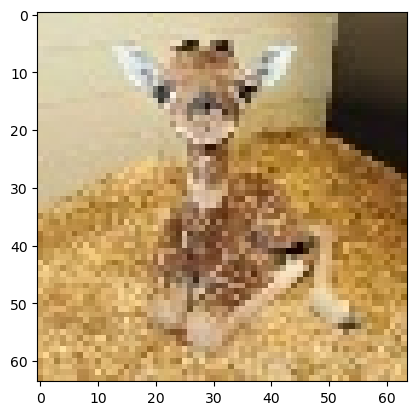

In [10]:
import matplotlib.pyplot as plt
index = 8
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print("y = " + str(test_set_y[:, index]) + ", it's a '" + classes[np.squeeze(test_set_y[:, index])] + "' picture.")